<a href="https://colab.research.google.com/github/taketaka-MU/hs-2023/blob/main/20230807/homerun.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **大谷選手のホームランデータから軌道を計算しよう**

参考サイト
* https://web3.hide.ac/articles/dtF3OzR8y
* https://baseballsavant.mlb.com/statcast_leaderboard


ボールの軌道

初期速度：$(u_0,v_0)=(V_0  \cos \theta, V_0  \sin \theta)$

位置：$(x(t),y(t))=(u_0 t, v_0 t - \frac{1}{2}t^2)$

第39号

日時：2023-07-28

ピッチャー：Gausman, Kevin

打球角度：28°

打球初速：46.3(m/s) = 時速167Km

到達距離：128m

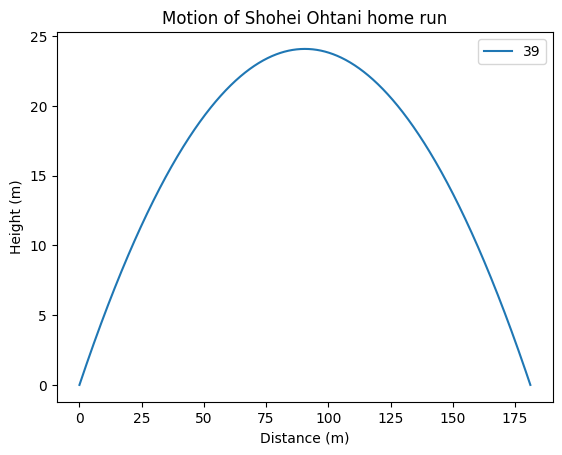

In [1]:
import numpy as np
import matplotlib.pyplot as plt

angle = np.radians(28.0) # 角度 (radian)
speed = 46.3 # 初速 (m/s)
g = 9.81  # 重力加速度 m/s^2
t_flight = 2 * speed * np.sin(angle) / g # 滞空時間
t = np.linspace(0, t_flight, num=1000)
x = speed * np.cos(angle) * t
y = speed * np.sin(angle) * t - 0.5 * g * t ** 2
plt.plot(x, y,label="39")

plt.xlabel('Distance (m)')
plt.ylabel('Height (m)')
plt.title('Motion of Shohei Ohtani home run')
plt.legend()
plt.show()

(35, 94)


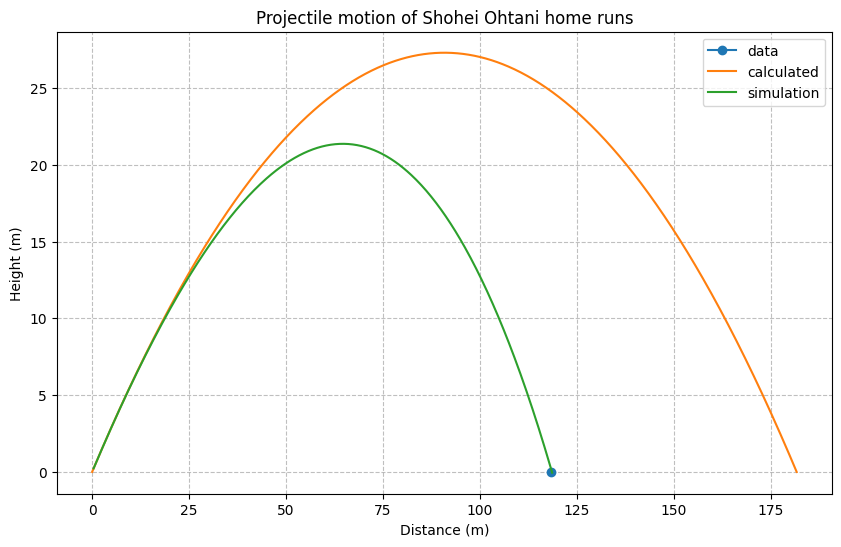

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

def calc(launch_speed, launch_angle): # with air resistance
    launch_angle = math.radians(launch_angle)  # Convert degrees to radians
    g = 9.81  # Gravity acceleration in m/s^2
    t_flight = 2 * launch_speed * np.sin(launch_angle) / g
    t = np.linspace(0, t_flight, num=1000)
    ux = launch_speed * math.cos(launch_angle)
    uy = launch_speed * math.sin(launch_angle)
    x, y = 0, 0
    dt=0.01
    k = 0.0045
    gux,guy,gx,gy = [], [], [], []
    for i in range(1000):
      uxold,uyold,xold,yold=ux,uy,x,y
      u=math.sqrt(ux*ux+uy*uy)
      ux += (- k * u * ux)*dt
      uy += (-g -k * u * uy)*dt
      x += ux * dt
      y += uy * dt
      gux.append(ux)
      guy.append(uy)
      gx.append(x)
      gy.append(y)
      if(y < 0):
        break;

    return gux,guy,gx,gy

plt.figure(figsize=(10, 6))
print(ohtani_home_run_data_clean.shape)
#print(ohtani_home_run_data_clean)
row=ohtani_home_run_data_clean.iloc[0]
hit_distance = row['hit_distance_m']
launch_speed = row['launch_speed_ms']
launch_angle = row['launch_angle']
x, y, diff = compute_trajectory(hit_distance, launch_speed, launch_angle)
ux, uy, cx, cy = calc(launch_speed, launch_angle)
plt.plot(hit_distance, 0,marker='o', label="data")
plt.plot(x, y,label="calculated")
plt.plot(cx, cy,label="simulation")

plt.xlabel('Distance (m)')
plt.ylabel('Height (m)')
plt.title('Projectile motion of Shohei Ohtani home runs')
plt.grid(which='both', linestyle='--', color='gray', alpha=0.5)
plt.legend()
plt.show()

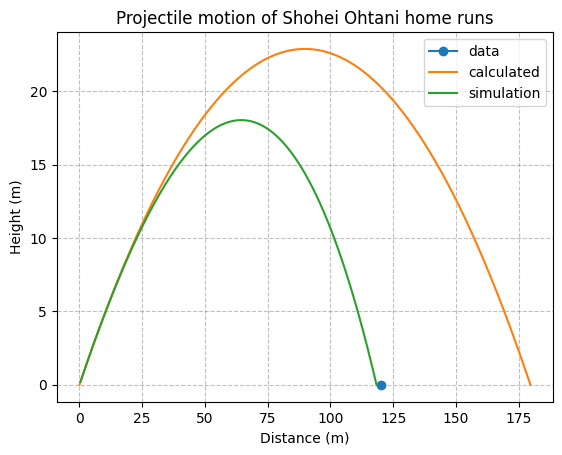

In [ ]:
row=ohtani_home_run_data_clean.iloc[22]
hit_distance = row['hit_distance_m']
launch_speed = row['launch_speed_ms']
launch_angle = row['launch_angle']
x, y, diff = compute_trajectory(hit_distance, launch_speed, launch_angle)
ux, uy, cx, cy = calc(launch_speed, launch_angle)
plt.plot(hit_distance, 0,marker='o', label="data")
plt.plot(x, y,label="calculated")
plt.plot(cx, cy,label="simulation")

plt.xlabel('Distance (m)')
plt.ylabel('Height (m)')
plt.title('Projectile motion of Shohei Ohtani home runs')
plt.grid(which='both', linestyle='--', color='gray', alpha=0.5)
plt.legend()
plt.show()

In [ ]:
print(row)

pitch_type                             FF
game_date             2022-04-29 00:00:00
release_speed                        93.1
release_pos_x                       -1.18
release_pos_z                         6.4
                             ...         
spin_axis                             200
delta_home_win_exp                 -0.098
delta_run_exp                       0.946
hit_distance_m                   127.7112
launch_speed_ms                 48.414312
Name: 2773, Length: 94, dtype: object


In [ ]:
ohtani_home_run_data_clean

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,hit_distance_m,launch_speed_ms
2907,CU,2022-09-11,78.4,-0.95,6.49,"Garcia, Luis",660271,677651,home_run,hit_into_play,...,0,2,0,Infield shift,Standard,28,-0.107,1.026,118.2624,44.927408
4686,SI,2022-09-07,92.4,1.86,6.3,"Chafin, Andrew",660271,605177,home_run,hit_into_play,...,4,4,3,Infield shift,Standard,140,0.208,0.904,122.2248,44.838001
3378,SL,2022-09-05,83.0,-2.82,5.28,"Hill, Garrett",660271,682051,home_run,hit_into_play,...,8,8,0,Infield shift,Strategic,93,0.002,1.0,126.7968,48.548423
882,FF,2022-09-05,90.4,2.04,5.7,"Alexander, Tyler",660271,641302,home_run,hit_into_play,...,4,4,0,Infield shift,Standard,151,0.109,1.582,116.4336,49.800132
508,FF,2022-08-31,97.9,-1.73,5.94,"Cole, Gerrit",660271,543037,home_run,hit_into_play,...,3,3,2,Infield shift,Standard,211,0.412,2.184,130.1496,47.967273
227,FS,2022-08-29,86.7,-1.09,6.04,"Montas, Frankie",660271,593423,home_run,hit_into_play,...,4,4,2,Infield shift,Standard,237,0.264,1.94,121.3104,45.910894
3826,SI,2022-08-28,93.7,1.7,6.37,"Mayza, Tim",660271,641835,home_run,hit_into_play,...,1,6,1,Infield shift,Standard,128,-0.071,1.838,108.8136,46.983787
3101,ST,2022-08-17,83.8,-2.22,5.07,"Festa, Matt",660271,670036,home_run,hit_into_play,...,7,7,11,Infield shift,Standard,72,0.003,1.595,120.7008,46.000302
3203,CU,2022-08-13,87.6,-1.72,6.2,"Duran, Jhoan",660271,661395,home_run,hit_into_play,...,1,1,3,Infield shift,Standard,33,0.048,0.985,121.6152,47.833161
2921,SL,2022-08-09,78.2,1.12,5.82,"Selman, Sam",660271,572125,home_run,hit_into_play,...,0,5,0,Infield shift,Standard,288,-0.025,0.967,115.2144,48.459016
